___
# <font color=#EEAA11> HW #5: Visualization </font>



<font color="pink">I watched the Grammar of Graphics video from the visualization ICA. I liked the ending use cases since I plan to work with geographic data in my midterm project.</font>

____

## <font color=#00BBFF> Problem #1 (10 pts) </font>

In this problem you are going to explore making a parallel plot using Pandas. In general, the plotting in Pandas is not the best; but, sometimes you just want to do quick EDA only with Pandas without dealing with other libraries.

🤓 Follow these steps:
* pick a dataset and put it into a dataframe,
* make a parallel plot using Pandas's `parallel_coordinates`,
* make at least two versions by choosing how you color the lines, (e.g., coloring by a categorical variable),
* think about what conclusions you would draw about your dataset from these explorations,
* scale the data using a z-score, and remake the parallel plot,
* does the scaling aid in the visualization process? if so, how? if not, why not? (the answer will depend on the dataset you choose! compare two datasets, and not penguins)

____

**If** you want some helper code, look the code below. **If** you use it, comment every line and ensure that it is PEP-8 compliant, and adapt it to your choice of dataset. (You might see if you can use the dataset you plan to use for your project, although it may not make sense in this context.)

Text(0.5, 1.0, 'with zscore')

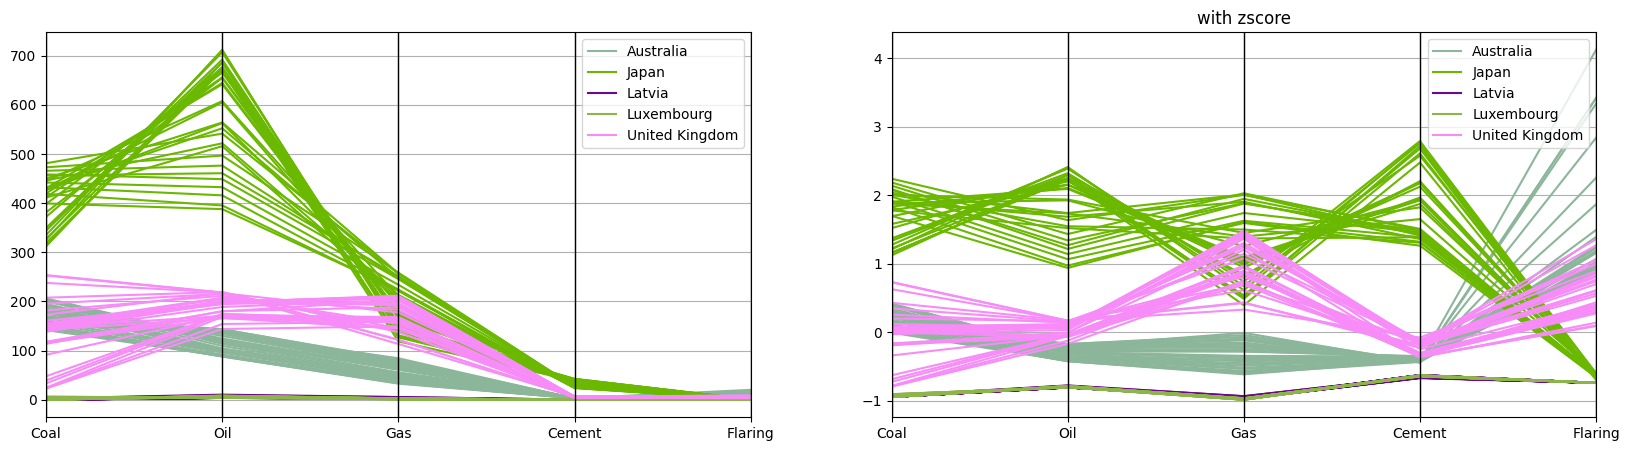

In [37]:
import seaborn as sns
import pandas as pd
import random
from scipy.stats import zscore
import numpy as np
import matplotlib.pyplot as plt
random.seed(315)
df = pd.read_csv("/Users/mnorton/Desktop/College/Grad Victory Lap/cmse830/Midterm Project/Emissions/GCB2022v27_MtCO2_flat.csv").dropna()
country_s = random.sample(list(df["Country"].unique()), 5)
df = df[df["Country"].isin(country_s)]


f, (a1,a2) = plt.subplots(ncols=2, nrows=1, figsize=(20,5))
pd.plotting.parallel_coordinates(df[["Country", "Coal", "Oil", "Gas", "Cement", "Flaring"]], "Country", ax=a1)


numeric_cols = df.select_dtypes(include=[np.number]).columns

df_zscore = df[numeric_cols].apply(zscore)

df_zscore["Country"] = df["Country"]
pd.plotting.parallel_coordinates(df_zscore[["Country", "Coal", "Oil", "Gas", "Cement", "Flaring"]], "Country", ax=a2)
plt.title("with zscore")


plotted for United Kingdom


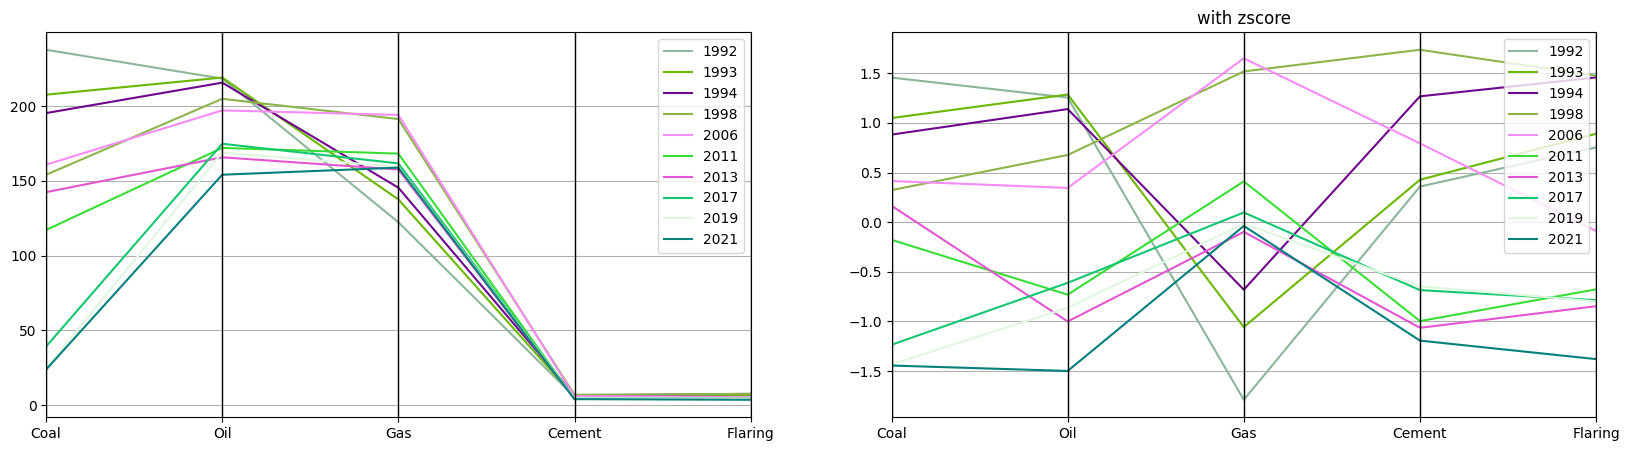

In [39]:

country_s = random.sample(list(df["Country"].unique()), 1)
df = df[df["Country"].isin(country_s)]
year_s = random.sample(list(df["Year"].unique()), 10)
df = df[df["Year"].isin(year_s)]

f, (a1,a2) = plt.subplots(ncols=2, nrows=1, figsize=(20,5))
pd.plotting.parallel_coordinates(df[["Year", "Coal", "Oil", "Gas", "Cement", "Flaring"]], "Year", ax=a1)

df_zscore = df[[ "Coal", "Oil", "Gas", "Cement", "Flaring"]].apply(zscore)

df_zscore["Year"] = df["Year"]
pd.plotting.parallel_coordinates(df_zscore[["Year", "Coal", "Oil", "Gas", "Cement", "Flaring"]], "Year", ax=a2)
plt.title("with zscore")
print("plotted for " + str(country_s[0]))


In [40]:
# import seaborn as sns
# import pandas as pd
# from scipy.stats import zscore
# import numpy as np
# import matplotlib.pyplot as plt

# f, (a1,a2) = plt.subplots(ncols=2, nrows=1, figsize=(20,5))

# # choose the penguin dataset
# df_p = sns.load_dataset("penguins").dropna()

# pd.plotting.parallel_coordinates(df_p[["species", "bill_length_mm", "bill_depth_mm", "flipper_length_mm", "body_mass_g"]], "species", ax=a1)

# # another option
# #pd.plotting.parallel_coordinates(df_p[["sex", "bill_length_mm",	"bill_depth_mm",	"flipper_length_mm",	"body_mass_g"]], "sex",ax=a1)

# numeric_cols = df_p.select_dtypes(include=[np.number]).columns

# df_p_s = df_p[numeric_cols].apply(zscore)

# df_p_s["species"] = df_p["species"]
# pd.plotting.parallel_coordinates(df_p_s, "species", ax=a2)
# plt.title("with zscore")

# #df_p_s["sex"] = df_p["sex"]
# #pd.plotting.parallel_coordinates(df_p_s[["sex", "bill_length_mm",	"bill_depth_mm",	"flipper_length_mm",	"body_mass_g"]], "sex",ax=a2)


____

## <font color=#00BBFF>  Problem #2 (10) </font>

Next, we are going to compare the previous result with HiPlot, which is a library specifically designed for exploring high-dimensional datasets. It tends to look better, have more features and _-- most importantly for EDA --_ it is interactive.

🤓 Follow these steps:
* install [HiPlot](https://github.com/facebookresearch/hiplot) on your machine,
* read the documentation to understand how to use HiPlot with a dataframe,
* open HiPlot in your notebook with a dataset you explored in the previous problem,
* play with HiPlot so that you know how to use its most important features:
  * how do you select a portion of one of the vertical axes?
  * how do you slide the range box vertically to select different portions of the data?
  * can you select (with the gray boxes) different ranges on different vertical axes?
  * how do you reorder the vertical axes?
  * what use the dataframe below the plot? what happens if you mouse over the rows?
  * for your dataset, set the order of the vertical axes to correspond to a narrative/story, and describe that in a markdown cell - image you are using such a plot for your project and you want to tell a specific story.

If you find HiPlot useful, consider using it in your project. [It works with streamlit.](https://facebookresearch.github.io/hiplot/tuto_streamlit.html)

In [42]:
!pip install -U -qqq hiplot # needed for Google colab
import hiplot as hip
print(f"HiPlot=={hip.__version__}")

HiPlot==0.1.33


In [48]:
df = pd.read_csv("/Users/mnorton/Desktop/College/Grad Victory Lap/cmse830/Midterm Project/Emissions/GCB2022v27_MtCO2_flat.csv").dropna()
hip.Experiment.from_dataframe(df[["Total", "Coal", "Oil", "Gas", "Cement", "Flaring", "Other"]]).display()

<IPython.core.display.Javascript object>

<font color="pink">Personally, due to the size of this dataset, I did see some benefits to using a HiPlot, but the
viz felt as though it lacked control to me. This could have been due to inexperience with the tool. I ordered the axes based off single impact emissions leading up to the total in the most recent generated visualization.</font>

____

## <font color=#00BBFF>  Problem #3 (30) </font>

It is time to start working on your project!

And, it is time to pay attention to the calendar! Your projects presentations will be the week of Oct. 16, which is only two weeks away. The following week is Fall Break. The next week, the week I am away, we will start diving more into the mathematics of data science.

Hopefully the HWs have prepared you for your project. Here is the schedule:
* just a reminder: I am out of town the week of October 30-November 3, but you'll have a guest instructor on probabilty and statistics; the week will be normal otherwise,
* the next week (October 23 and 24) is Fall Break - we don't meet on Monday of that week,
* your projects are due at the end of that week: in D2L by midnight on Friday, October 27th,
* during the week of Oct. 16, you will present your projects to the other members of your class; the procedure will be:
  * the presentations will happen on Wednesday, October 18th. the order of presentations will be random, so you might be presenting first on that day (be ready and arrive to the class on time! no excuses! 😉),
  * for the presentations, we are going with 12 groups of 4 and 5, which will be announced by Mahyar on the day of presentation,
  * during the presentations, you will listen to some of the presentations and interact (e.g., ask questions) with the person speaking,
  * you will complete a report of the speakers that you listened to and turn that in (to D2L as a pdf file).

So that you have a full, restful Fall Break, there will be no homework that week; and, your midterm project will have been completed the prior week.

Here are the requirements for your project. Note that these requirements may not apply to each student perfectly, because you all have some flexibility in how you design your project. If there are any special issues with your project (e.g., the data is proprietary), please let me know so that we can work with your situation.
* your project will be a streamlit app with two levels of interactivity:
  * in streamlit (e.g., through sliders, dropdowns, etc.),
  * in the visualizations themselves (e.g., using Altair or HiPlot),
  * you must have a goal, a message, a story -- there should be a point to what you are doing,
  * the app should contain any necessary text that aids the user to understand and explore your story,
  * the app should be deployable from your code at Github, and your streamlit link should be sent to Mahyar by Wed before class (do not send the link for the Github repository).

  A good example [is here](https://caron14-streamlit-linearregression-boston-house-prices-m9mvyd.streamlitapp.com) - try to be at least this complete in your app.

  As always, please contact us, or use Slack, with any issues that arise!

  🤓 For this HW, you are going to write an essay that is 500 to 1000 words. Use the [best markdown practices](https://www.markdownguide.org/cheat-sheet/), and put everything in a cell below. (You can use one plot, but no more.) What you will write is a proposal for your project. Include this in your proposal:
  1. What is the goal, what is the point? What is the "big-picture" question you are trying to answer? Who cares? Why do they care?
  2. Discuss which datasets you have looked at toward this goal. Which ones did you reject and why? Which dataset did you finally choose?
  3. Describe the dataset. What is in it? Where did it come from? Are there issues, such as missingness? If so, what type (e.g., MNAR)?
  4. What preliminary studies have you done? Do they look promising?
  5. What will your web app do? How will this be useful to people?
  6. What visualization tools do you plan on using? Why did you choose these? How will they serve the goal you outlined in step 1?
  7. Summarize with why you think this is a project worthy of completing.

  In your writing, use the best rules of English grammar, punctuation and formatting. Be sure you edit the proposal a few times before submitting it. It should be very clear, easy to read and convincing.

  Here is the logic I want you to have. The goal of the project is to present your data to someone else you don't know and who does not know very much about data science. You could imagine a scenario in which you work at a large company and are the data scientist. You are asked to design and build a web app for a mostly non-technical manager with the goal that they engage with the data as a "dashboard", perhaps as a way to report to them on what your team has done and why it is interesting an important. Thus, it is important that you understand the narrative that goes with your data, choose the best visualization to display your ideas, and layout the app in a way that is logical for a user you have never met.
  



____

Midterm Project Proposal: \
National and Annual Emissions Data \
– Mikayla Norton

During the exploratory period of this project, leading up to my work on the midterm, I have explored a number of datasets, ranging from purely numeric to purely categorical, and everything in between. Throughout the homework assignments, I concentrated my time in three datasets, a mushroom feature (categorical) dataset for classifying poisonous or edible mushrooms, a Spotify dataset often used to pinpoint characteristics of chart-topping hits, and an global emissions dataset ranging across centuries and drilling down into various emissions categories. 

I have selected to proceed with the emissions dataset for the midterm project as I feel it has the most benefit in this heavily visualization- and interactive- based project. I am a believer that to be a successful data scientist, you must also be an author. You must have the ability to architect and present a narrative with the information. With this theme in mind, I will use a variety of visualization tools including but not limited to Streamlit, Plotly, Matplotlib, Seaborn, and built-in tools from Pandas. This tools will allow me to generate visualizations to showcase how emissions have evolved over time by country/region and by emission type. 

This project will get "political", in the sense that some individuals feel climate change is not a current and real issue. However, I feel that is why this exploration is needed. Any individual regardless of political ideation would agree that there are issues facing our species, regardless of what those issues may be. From my perspective, each of those issues cannot be debated, evaluated, or solved without first addressing climate change, which is accelerated by the release of these toxins. Without addressing climate change, there will eventually be no planet for us to utilize in debating those other issues.


<Axes: xlabel='Year', ylabel='Total'>

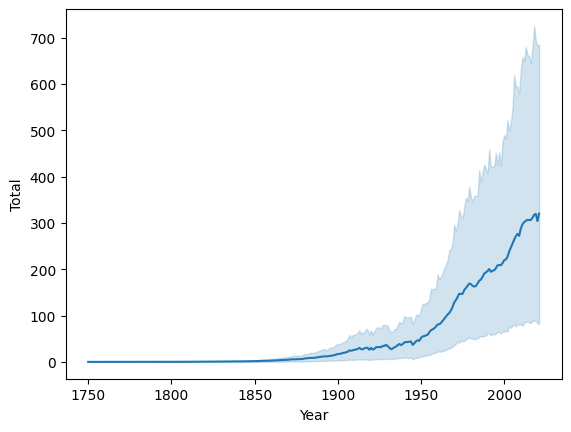

In [51]:
df = pd.read_csv("/Users/mnorton/Desktop/College/Grad Victory Lap/cmse830/Midterm Project/Emissions/GCB2022v27_MtCO2_flat.csv")
sns.lineplot(df,x="Year", y="Total")

To demonstrate this impact further, I have plotted the trendline for annual total emissions for all nations. The lineplot is shadowed by a range of existing values. I believe this lineplot is an important demonstration of the changes this information with time. We are seeing a global average rise in emissions with a rapidly increasing trend following the 1950s. This trend, which can be correlated with later industrial revolutions and digital transformations is linked with the increasing greenhouse effect.

There is MAR randomness to observe in the data, as some years are filled with empty values due to the earlieness of these measures being impossible to observe or calculate with technology at the time. I plan to address this by starting the individual time series spectrums at each respective starting point, rather than the overall dataset starting point.

I have already began to utilize the multiselect features of streamlit to generate line plot time series figures of emissions over time, filtered by country. Now that I understand how to organize the output from our in class activities and homework assignments, I believe I could demonstrate an excellent side-by-side narrative of emissions progression over time, and by regional categorization. I will address regional data using tools from geopandas to get creative with hea tmapping and progressive visualization (having a figure that changes over time).

By the conclusion of this project, the web app will take a variety of inputs from the user, including country, region, emissions type(s), to produce a set of visualizations that can be exported based on preference. 